<a href="https://colab.research.google.com/github/mezkymy/employee-retention/blob/main/employee_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

“Sumber daya manusia (SDM) adalah aset utama yang perlu dikelola dengan baik oleh perusahaan agar tujuan bisnis dapat tercapai dengan efektif dan efisien. Pada kesempatan kali ini, kita akan menghadapi sebuah permasalahan tentang sumber daya manusia yang ada di perusahaan. Fokus kita adalah untuk mengetahui bagaimana cara menjaga karyawan agar tetap bertahan di perusahaan yang ada saat ini yang dapat mengakibatkan bengkaknya biaya untuk rekrutmen karyawan serta pelatihan untuk mereka yang baru masuk. Dengan mengetahui faktor utama yang menyebabkan karyawan tidak merasa nyaman untuk meneruskan bekerja, perusahaan dapat segera menanggulanginya dengan membuat program-program yang relevan dengan permasalahan karyawan. “

In [2]:
# load data directly from google sheets
gid = '1577557022'
sheet_id = '1EQlE-TUc06O1-HBRP-siI3ZV_4g48-68'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
raw = pd.read_csv(url)
df = raw.copy()
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


Pada kolom `AlasanResign`, beberapa karyawan/pegawai berstatus `masih_bekerja`. Berdasarkan hal tersebut, karyawan dapat dipisahkan menjadi karyawan yang sudah resign dan yang belum resign, sehingga suatu kolom target dapat dibentuk jika hendak membentuk sebuah model prediksi.

In [3]:
df['Resign'] = [0 if x == 'masih_bekerja' else 1 for x in df['AlasanResign']]
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,1
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,1


Untuk memastikan lebih lanjut bahwa semua karyawan yang sudah resign tertandai dengan benar, perlu diperiksa bahwa semua karyawan yang *belum* resign tidak memiliki tanggal resign (jika karyawan memiliki tanggal resign maka seharusnya ditandai sebagai resign)

In [4]:
df[df['Resign'] == 0].TanggalResign.unique()

array(['-'], dtype=object)

Menggunakan method `.unique()` pada kolom `TanggalResign` pada karyawan yang ditandai tidak resign, tidak ada nilai lain selain `-` sehingga semua karyawan yang memang belum resign dipastikan belum ada tanggal resignnya.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

Pada kolom `IkutProgramLOP`, hanya 29 baris yang tidak kosong/NaN (berisi angka 0 atau 1). Jumlah yang sangat sedikit ini menjadi pertimbangan untuk menghapus kolom tersebut, karena jika kolom tetap dimasukkan ke dalam analisa/model maka signifikansi kekuatan prediksinya akan sangat lemah, jika memang ada.

Untuk kolom `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `JumlahKetidakhadiran`, dan `AlasanResign` terdapat beberapa baris yang tidak ada isinya. Penanganan missing values tersebut akan dilakukan setelah dilihat secara mendalam.  

In [6]:
df.drop('IkutProgramLOP', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [7]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,Resign
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,287.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.540070
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.499262
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


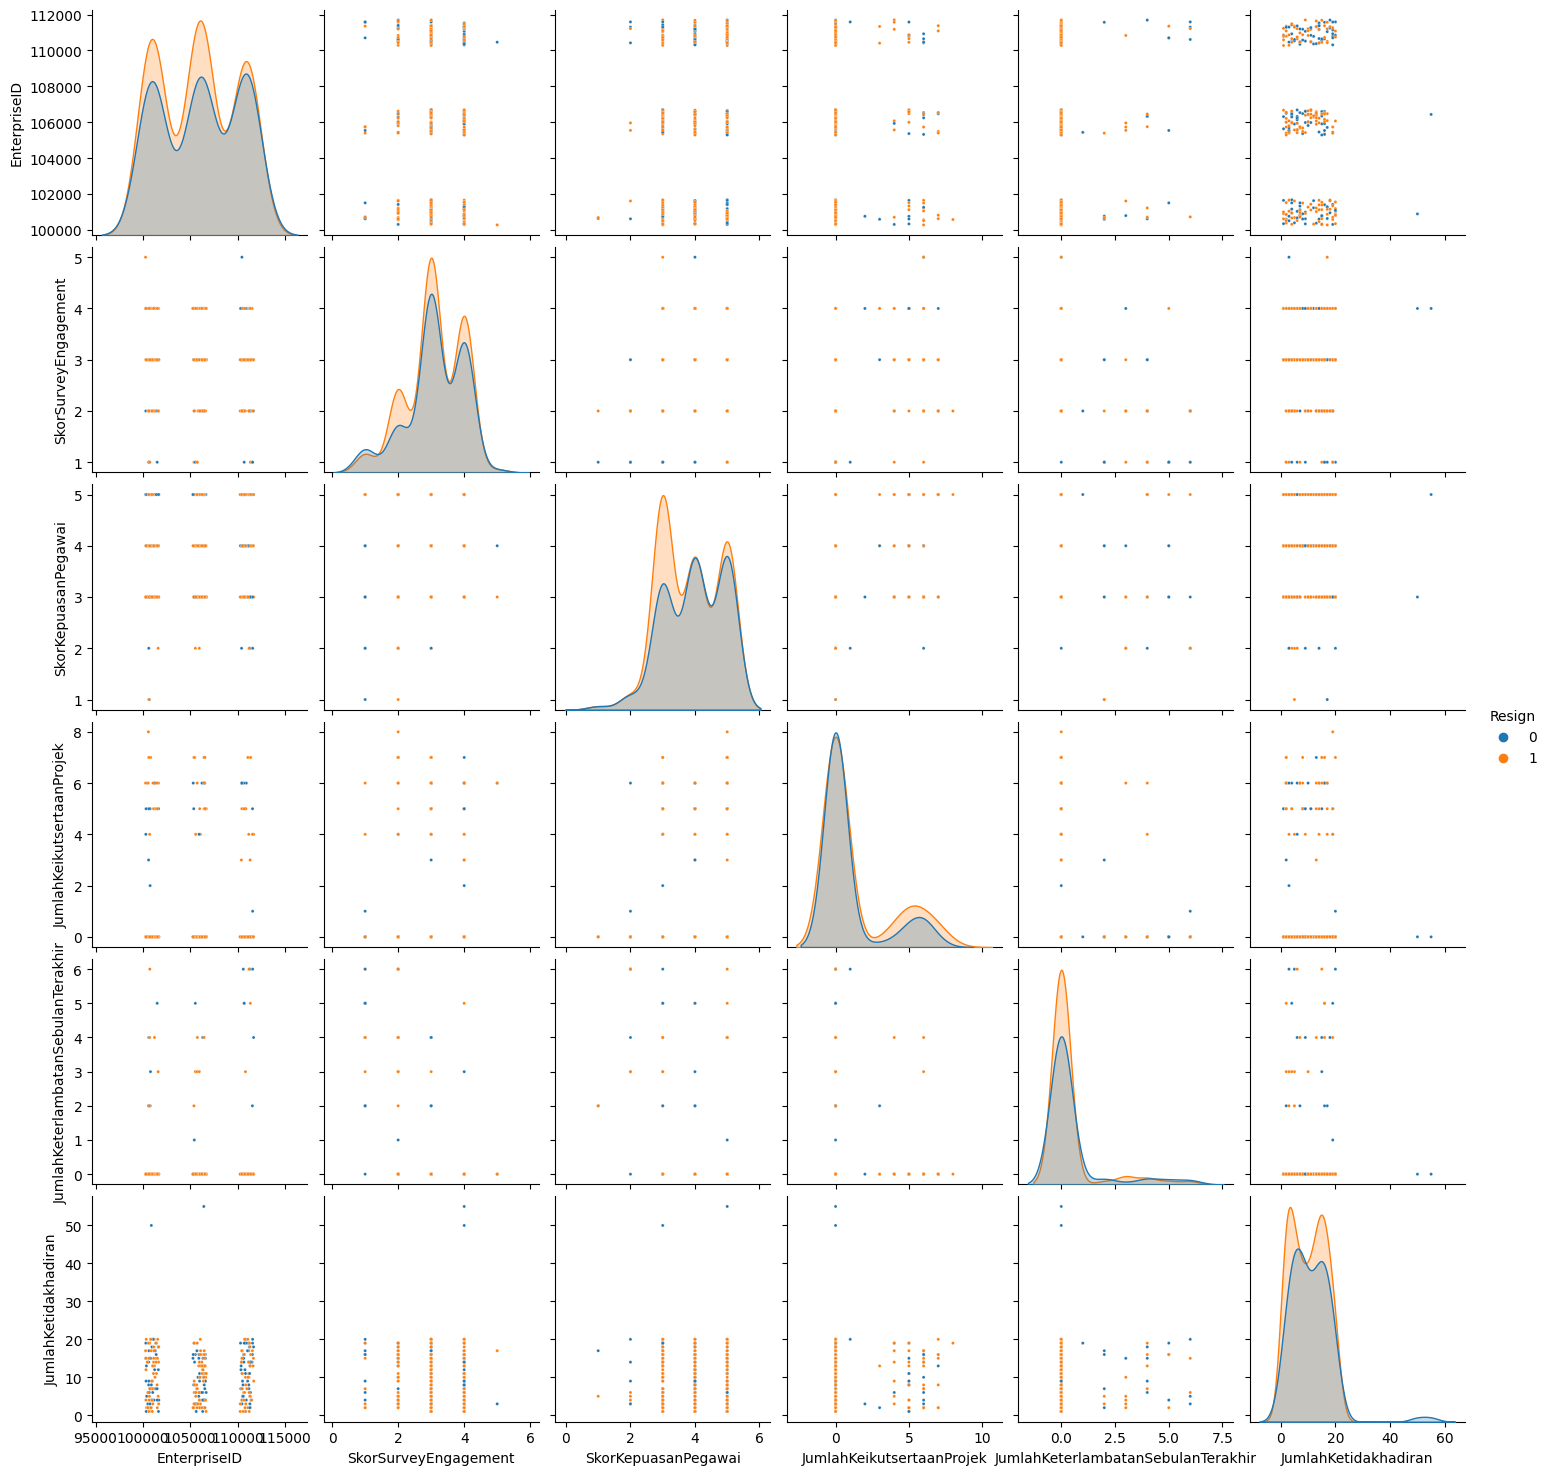

In [9]:
# show scatter plots between numerical columns
sns.pairplot(df, hue='Resign', plot_kws={"s": 5})
plt.show()